In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

X = X[y<2, :2]
y = y[y<2]

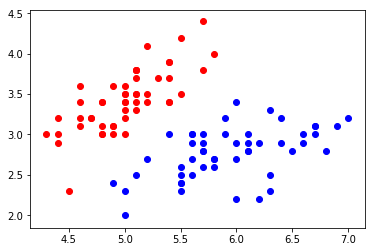

In [14]:
plt.scatter(X[y==0, 0],X[y==0, 1],color = 'r')
plt.scatter(X[y==1, 0],X[y==1, 1],color = 'b')
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)

### Linear SVM：(hard margin: big C)

In [22]:
from sklearn.svm import LinearSVC #Linear Support Vector Classifier

svc = LinearSVC(C = 1e9) #C越大，容错空间越小，越趋近于Hard Margin。C越小，容错空间大，趋近于soft margin
svc.fit(X_standard, y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [23]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


/Users/bessie/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


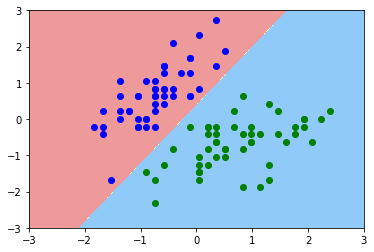

In [24]:
plot_decision_boundary(svc, axis = [-3,3,-3,3])
plt.scatter(X_standard[y == 0, 0],X_standard[y == 0, 1],color = 'b')
plt.scatter(X_standard[y == 1, 0],X_standard[y == 1, 1],color = 'g')
plt.show()

### Linear SVM: (soft margin: small C)

/Users/bessie/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


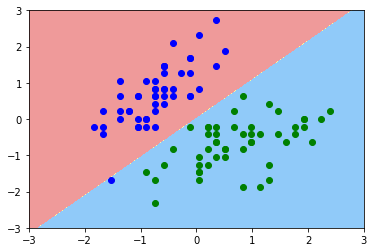

In [25]:
svc2 = LinearSVC(C = 0.01) #C越大，容错空间越小，越趋近于Hard Margin。C越小，容错空间大，趋近于soft margin
svc2.fit(X_standard, y)

plot_decision_boundary(svc2, axis = [-3,3,-3,3])
plt.scatter(X_standard[y == 0, 0],X_standard[y == 0, 1],color = 'b')
plt.scatter(X_standard[y == 1, 0],X_standard[y == 1, 1],color = 'g')
plt.show()

#### 上图中，有一个点是分类错的。

In [20]:
svc.coef_ #theta1, theta2

array([[ 4.03242882, -2.50699754]])

In [26]:
svc.intercept_ #theta0

array([0.92736312])

In [29]:
def plot_svc_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    
    # 决策边界：
    # w0 * x0 + w1 * x1 + b = 0
    # => x1 = - w0/w1 * x0 - b/w1
    #给出x0，就可以计算出相应的x1
    
    plot_x = np.linspace(axis[0], axis[1], 200) #在用户给的x轴范围之间取200个点
    
    # 决策边界的上面的边界：
    # w0 * x0 + w1 * x1 + b = 1
    # => x1 = - w0/w1 * x0 - b/w1 - 1/w1
    up_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]

    # 决策边界的下面的边界：
    # w0 * x0 + w1 * x1 + b = -1
    # => x1 = - w0/w1 * x0 - b/w1 + 1/w1
    down_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]
    
    #但是up_y, down_y可能超出了用户规定的y轴界限：
    up_indexes = (up_y >= axis[2]) & (up_y <= axis[3]) 
    down_indexes = (down_y >= axis[2]) & (down_y <= axis[3]) 
    
    plt.plot(plot_x[up_indexes], up_y[up_indexes],color='black')
    plt.plot(plot_x[down_indexes], down_y[down_indexes],color='black')
    #plt.show()

/Users/bessie/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


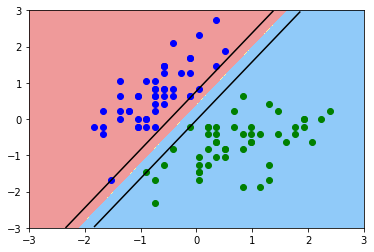

In [30]:
plot_svc_decision_boundary(svc, axis = [-3,3,-3,3])
plt.scatter(X_standard[y == 0, 0],X_standard[y == 0, 1],color = 'b')
plt.scatter(X_standard[y == 1, 0],X_standard[y == 1, 1],color = 'g')
plt.show()

/Users/bessie/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


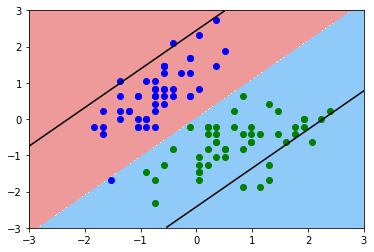

In [31]:
plot_svc_decision_boundary(svc2, axis = [-3,3,-3,3])
plt.scatter(X_standard[y == 0, 0],X_standard[y == 0, 1],color = 'b')
plt.scatter(X_standard[y == 1, 0],X_standard[y == 1, 1],color = 'g')
plt.show()